In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

print('setup completed')

setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/uncleaned bike sales data.xlsx'

df = pd.read_excel(file_path)

df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [ ]:
df.columns = df.columns.str.replace('#','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.head()

,sales_order,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product_description,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [ ]:
#First of all, let's check NaN, missing values and duplicated values
isna = df.isna().sum()
duplicated = df.duplicated().sum()

print(f'Missing Values:\n {isna} \n Duplicated Values: {duplicated}\n')

Missing Values:
 sales_order            0
date                   0
day                    1
month                  0
year                   0
customer_age           0
age_group              1
customer_gender        0
country                0
state                  0
product_category       0
sub_category           0
product_description    1
order_quantity         1
unit_cost              0
unit_price             0
profit                 0
cost                   0
revenue                0
dtype: int64 
 Duplicated Values: 0



In [ ]:
df = df.dropna()

In [ ]:
# Let's check the type of data we're dealing with and make some changes to have it more accurated

df.dtypes

,0
sales_order,int64
date,datetime64[ns]
day,float64
month,object
year,int64
customer_age,int64
age_group,object
customer_gender,object
country,object
state,object


In [ ]:
#Day and order quantity as a float - must be int
df['day'] = df['day'].astype(int)
df['order_quantity'] = df['order_quantity'].astype(int)

In [ ]:
df.dtypes

,0
sales_order,int64
date,datetime64[ns]
day,int64
month,object
year,int64
customer_age,int64
age_group,object
customer_gender,object
country,object
state,object


In [ ]:
#Now, we have the knolowdge that it's an uncleaned data, so we expect to find more worng values along the dataset. For this, i like to check every unique values to understand if have misstype values in any row
for coluna in df.columns:
    print(f'Unique values from {coluna}: {df[coluna].unique()}\n')


Unique values from sales_order: [261695 261697 261698 261699 261700 261701 261702 261703 261705 261706
 261707 261708 261710 261711 261712 261713 261714 261717 261718 261719
 261720 261721 261722 261723 261724 261725 261726 261727 261728 261729
 261730 261731 261732 261733 261734 261735 261736 261737 261738 261739
 261740 261741 261742 261743 261744 261745 261746 261747 261748 261749
 261750 261751 261752 261753 261754 261755 261756 261757 261758 261759
 261760 261761 261762 261763 261764 261765 261766 261767 261768 261769
 261770 261771 261772 261773 261774 261775 261776 261777 261778 261779
 261780 261781 261782]

Unique values from date: <DatetimeArray>
['2021-12-01 00:00:00', '2021-12-02 00:00:00', '2021-12-03 00:00:00',
 '2021-12-04 00:00:00', '2021-12-05 00:00:00', '2021-12-06 00:00:00',
 '2021-12-07 00:00:00', '2021-12-08 00:00:00', '2021-12-09 00:00:00',
 '2021-12-10 00:00:00', '2021-12-11 00:00:00', '2021-12-12 00:00:00',
 '2021-12-13 00:00:00', '2021-12-14 00:00:00', '2021-12

In [ ]:
#As we can see in the block cell above, there's some interesting values we need to check, like Revenue = 0 , United States being repeated etc.Also, let's make some changes in our dataset to get it smaller and easier, eliminating columns that are useless, since it has just one value
#df.loc[df['month'] == 'Decmber']
df['month'] = df['month'].replace({'Decmber':'December'})

In [ ]:
df['customer_gender'] = df['customer_gender'].replace({'F':'Female', 'M':'Male'})


In [ ]:
df['country'] = df['country'].replace({' United States':'United States', 'United  States':'United States','United States ':'United States'})

In [ ]:
#df.loc[df['unit_price']== 0]
df.loc[8,'unit_price'] = df.loc[8,'profit']/df.loc[8,'order_quantity']

In [ ]:
#df.loc[df['unit_cost']==0]
df.loc[4,'unit_cost'] = df.loc[0, 'unit_cost']
df.loc[4,'cost'] = df.loc[4, 'unit_cost']*df.loc[4, 'order_quantity']

In [ ]:
#df.loc[df['revenue']== 0]
df.loc[8,'revenue'] = df.loc[8,'profit'] - df.loc[8,'cost']

In [ ]:
df = df.drop(columns=['product_category', 'sub_category']).reset_index(drop=True)
df.head()

,sales_order,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_description,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,2021-12-01,1,December,2021,39,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180
1,261695,2021-12-01,1,December,2021,44,Adults (35-64),Male,United Kingdom,England,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
2,261697,2021-12-02,2,December,2021,37,Adults (35-64),Male,United States,California,"Mountain-400-W Silver, 46",2,420,769,698,840,1538
3,261698,2021-12-02,2,December,2021,31,Young Adults (25-34),Female,Australia,New South Wales,"Mountain-400-W Silver, 42",1,420,769,349,420,769
4,261699,2021-12-03,3,December,2021,37,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590


In [ ]:
#Now, just to make it clear, let's check again if there's any strang values in our dataset
for coluna in df.columns:
    print(f'Unique values from {coluna}: {df[coluna].unique()}\n')

Unique values from sales_order: [261695 261697 261698 261699 261700 261701 261702 261703 261705 261706
 261707 261708 261710 261711 261712 261713 261714 261717 261718 261719
 261720 261721 261722 261723 261724 261725 261726 261727 261728 261729
 261730 261731 261732 261733 261734 261735 261736 261737 261738 261739
 261740 261741 261742 261743 261744 261745 261746 261747 261748 261749
 261750 261751 261752 261753 261754 261755 261756 261757 261758 261759
 261760 261761 261762 261763 261764 261765 261766 261767 261768 261769
 261770 261771 261772 261773 261774 261775 261776 261777 261778 261779
 261780 261781 261782]

Unique values from date: <DatetimeArray>
['2021-12-01 00:00:00', '2021-12-02 00:00:00', '2021-12-03 00:00:00',
 '2021-12-04 00:00:00', '2021-12-05 00:00:00', '2021-12-06 00:00:00',
 '2021-12-07 00:00:00', '2021-12-08 00:00:00', '2021-12-09 00:00:00',
 '2021-12-10 00:00:00', '2021-12-11 00:00:00', '2021-12-12 00:00:00',
 '2021-12-13 00:00:00', '2021-12-14 00:00:00', '2021-12

# EDA

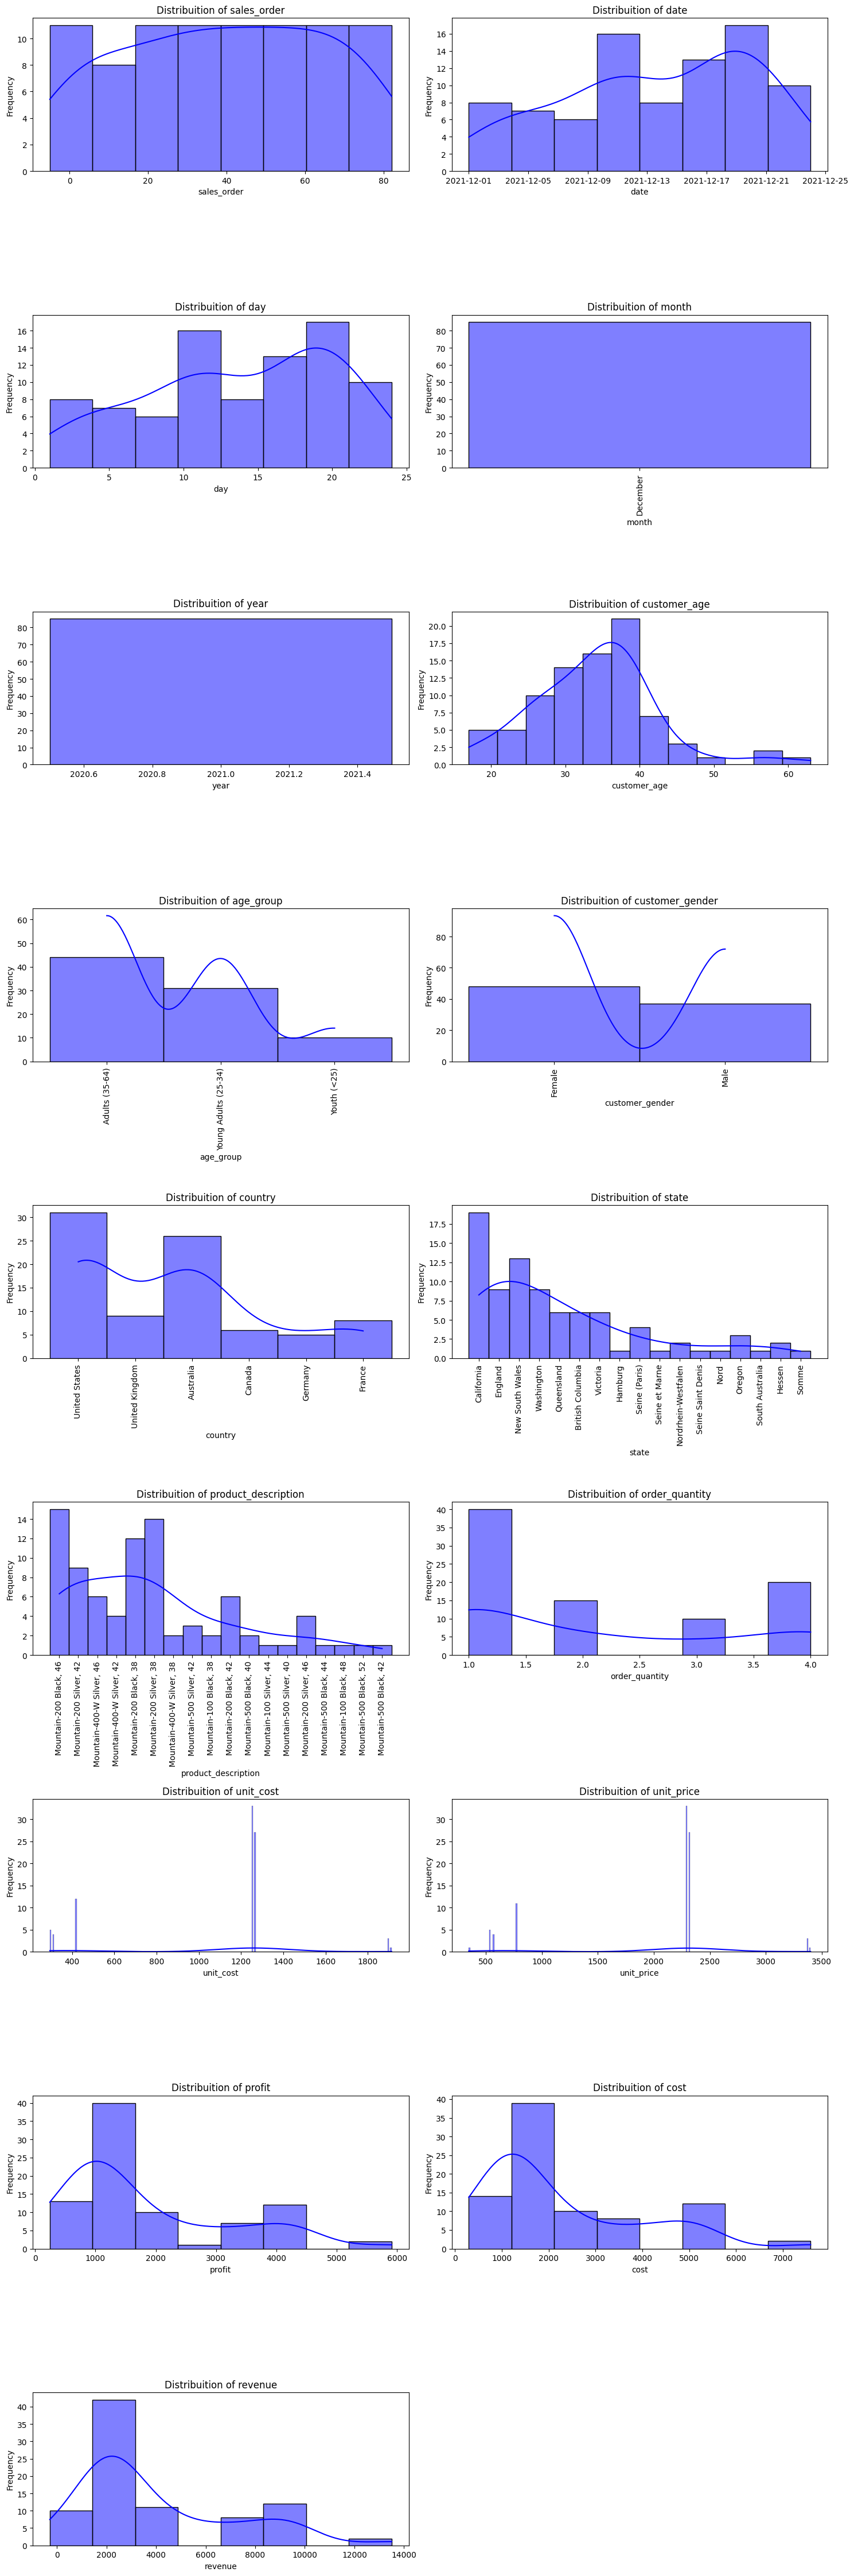

In [ ]:
#Let's start de EDA looking the distribution of the data
num_vars = len(df.columns)

cols = 2

rows = (num_vars // cols) + (num_vars % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Distribuition of {col}')
    axes[i].set_ylabel('Frequency')
    if df[col].dtype == 'object':
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    else:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

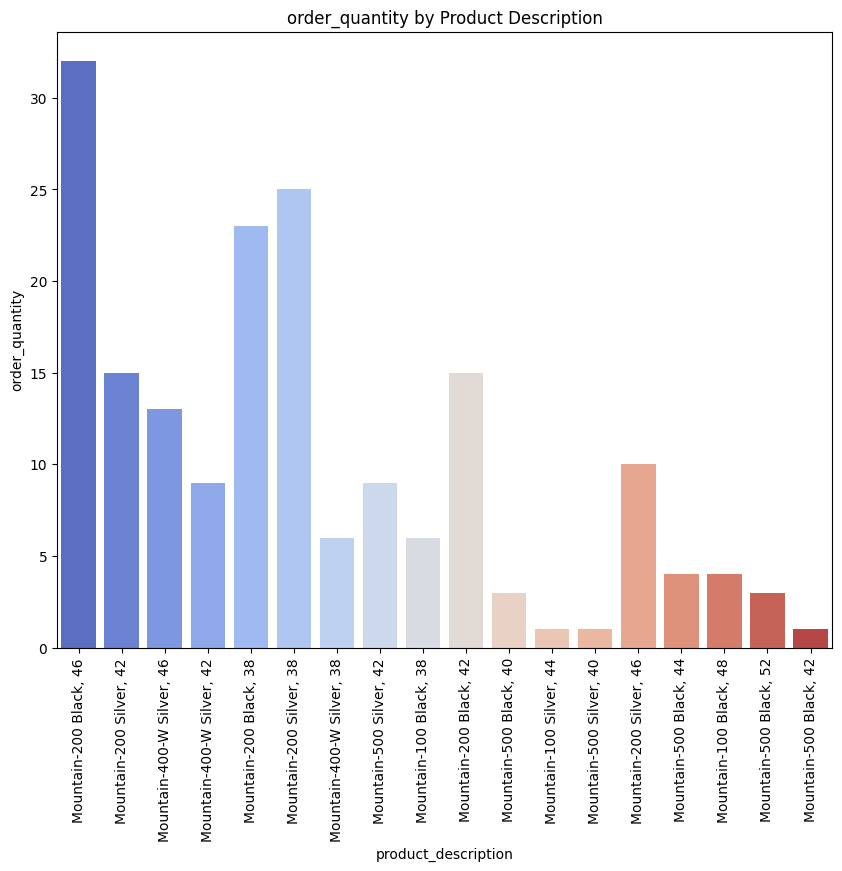

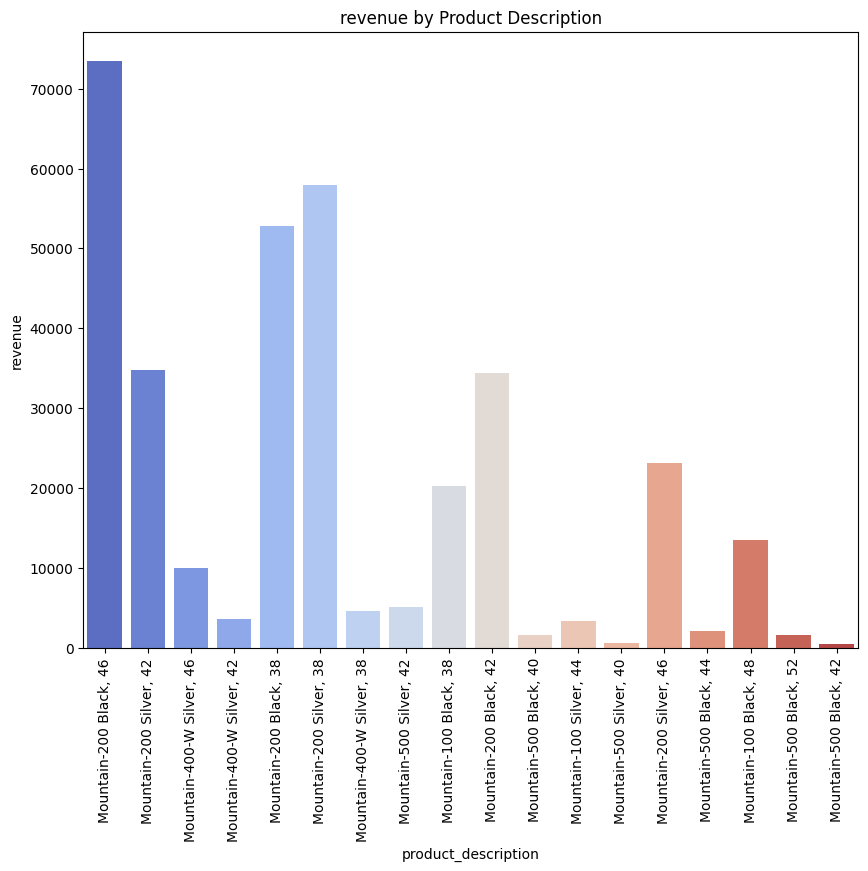

In [ ]:
data = ['order_quantity', 'revenue']

for i, col in enumerate(data):
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x=df['product_description'],
        y=df[col],
        errorbar= None,
        palette = 'coolwarm',
        estimator = np.sum
    )
    plt.title(f'{col} by Product Description')
    plt.xticks(rotation=90)
    plt.show()


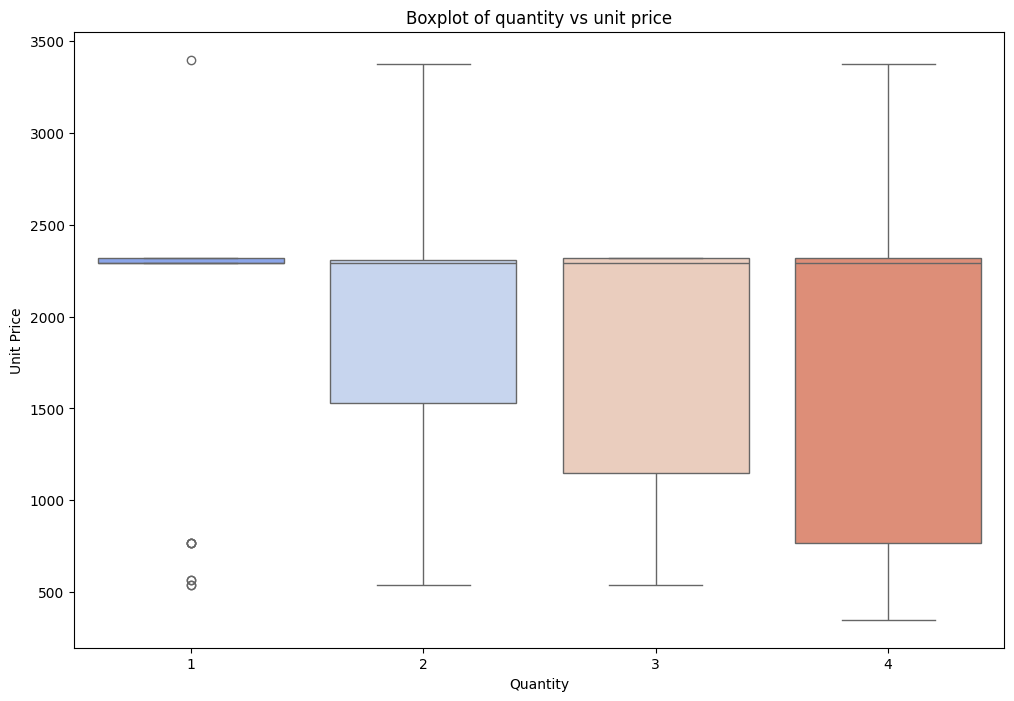

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(
    data = df,
    x = 'order_quantity',
    y = 'unit_price',
    palette = 'coolwarm'
)
plt.title('Boxplot of quantity vs unit price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

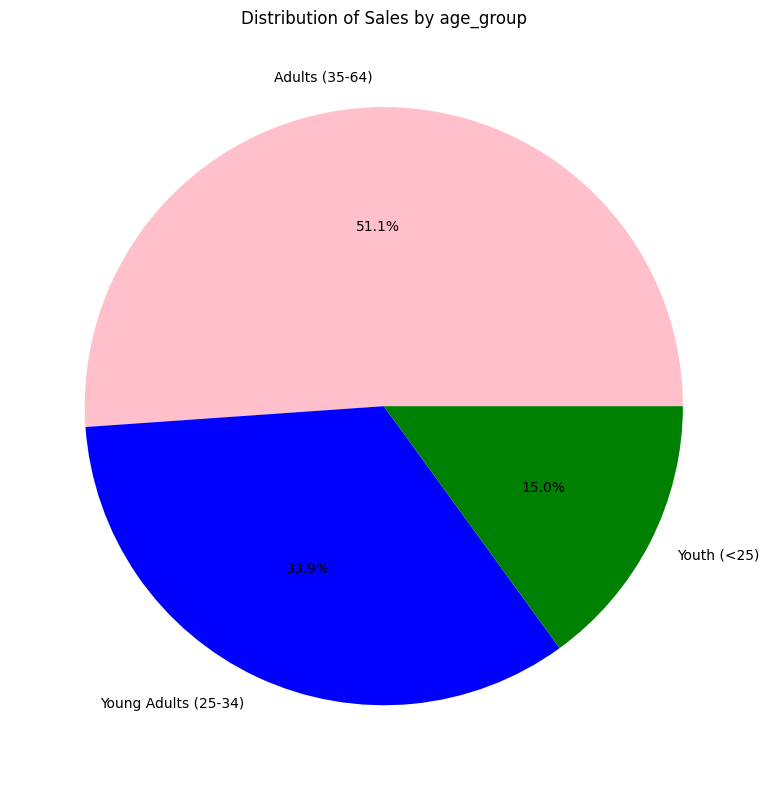

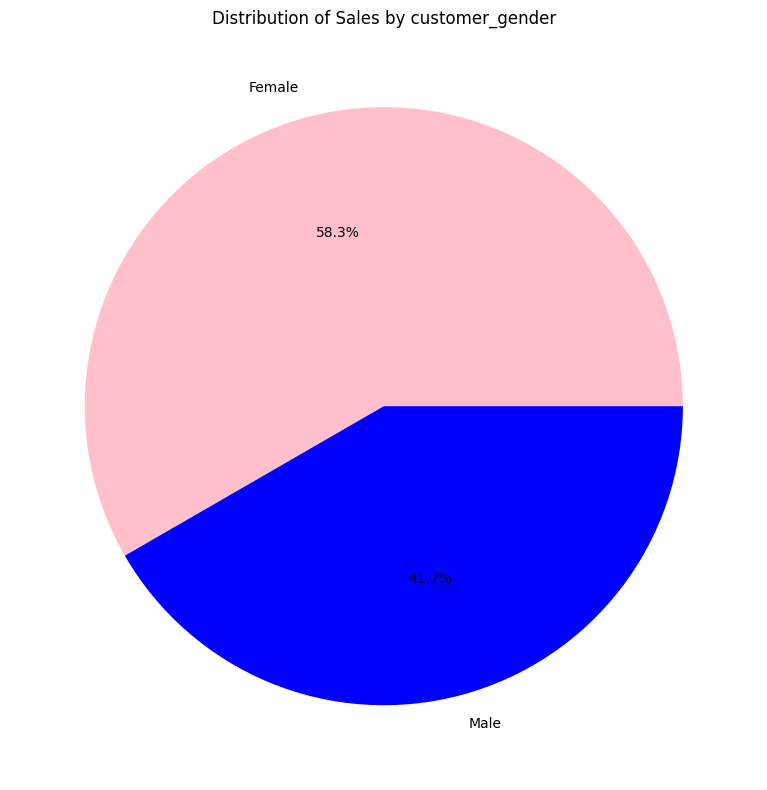

In [ ]:
data1= ['age_group', 'customer_gender']

for i, col in enumerate(data1):
  df_grouped = df.groupby(col)['order_quantity'].sum().reset_index()
  plt.figure(figsize=(12,8))
  plt.pie(
      x = df_grouped['order_quantity'],
      labels=df_grouped[col],
      autopct = '%1.1f%%',
      colors = ['pink','b','g']
  )
  plt.title(f'Distribution of Sales by {col}')
  plt.tight_layout()
  plt.show()

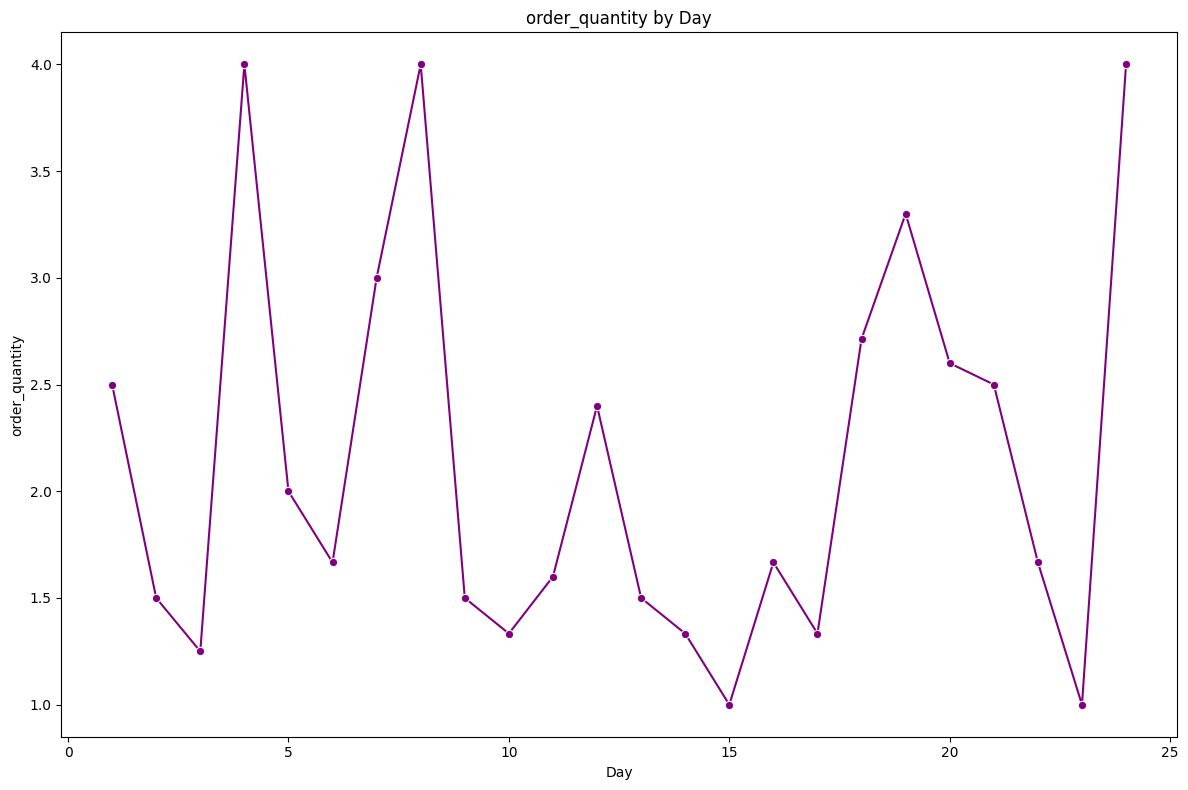

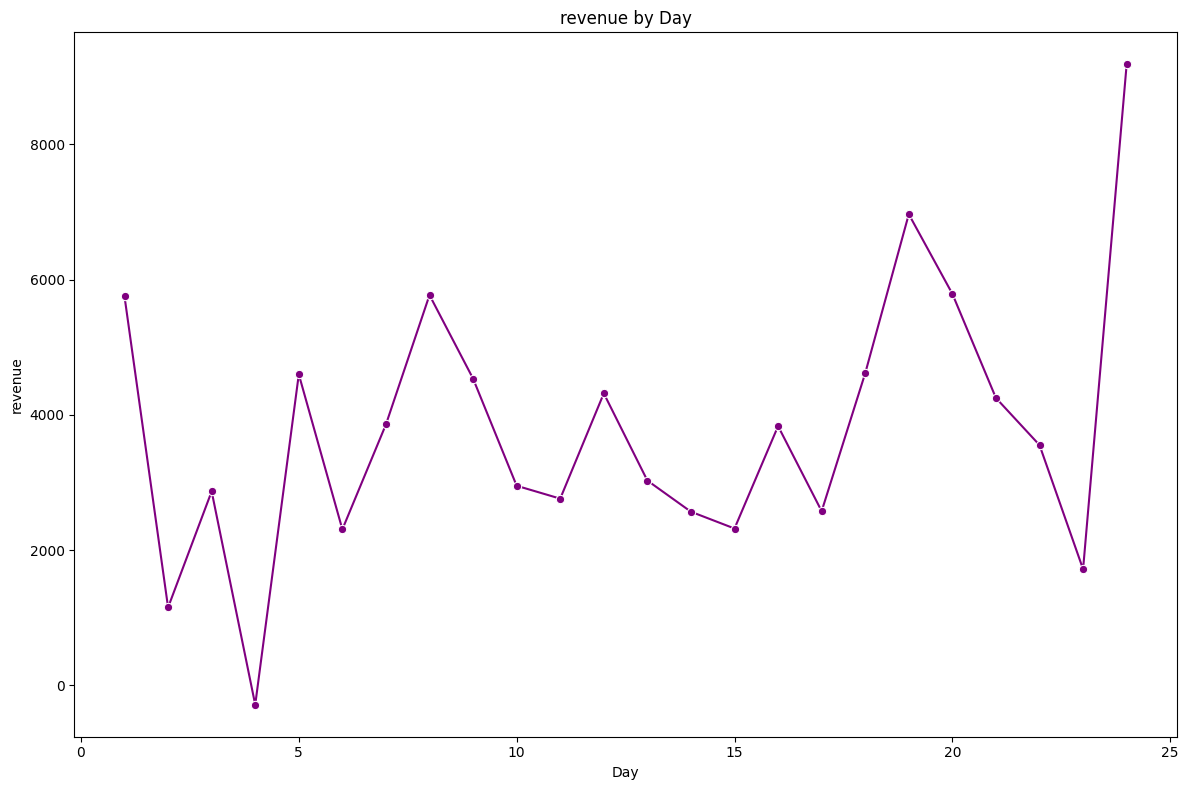

In [ ]:
data2= ['order_quantity','revenue']
for i, col in enumerate(data2):
  plt.figure(figsize=(12,8))
  sns.lineplot(
      x = df['day'],
      y = df[col],
      marker = 'o',
      color ='purple',
      errorbar=None
  )
  plt.title(f'{col} by Day')
  plt.xlabel('Day')
  plt.tight_layout()
  plt.show()

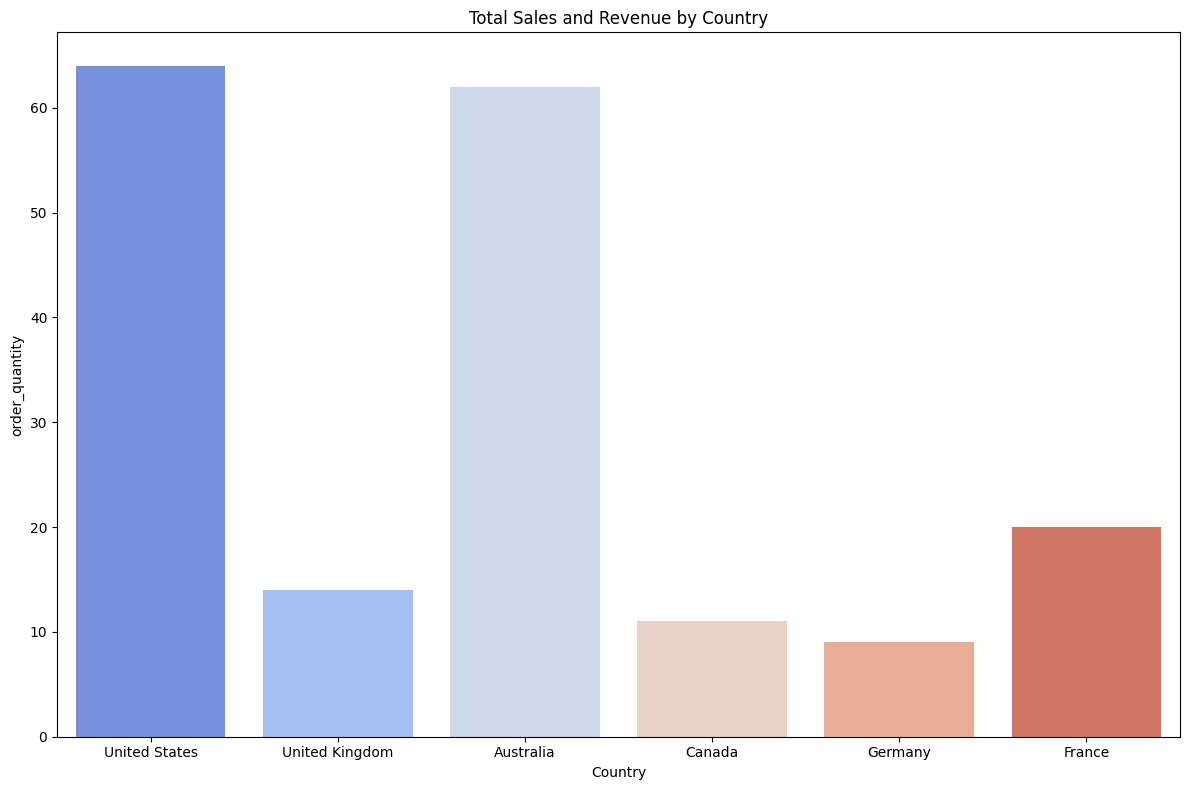

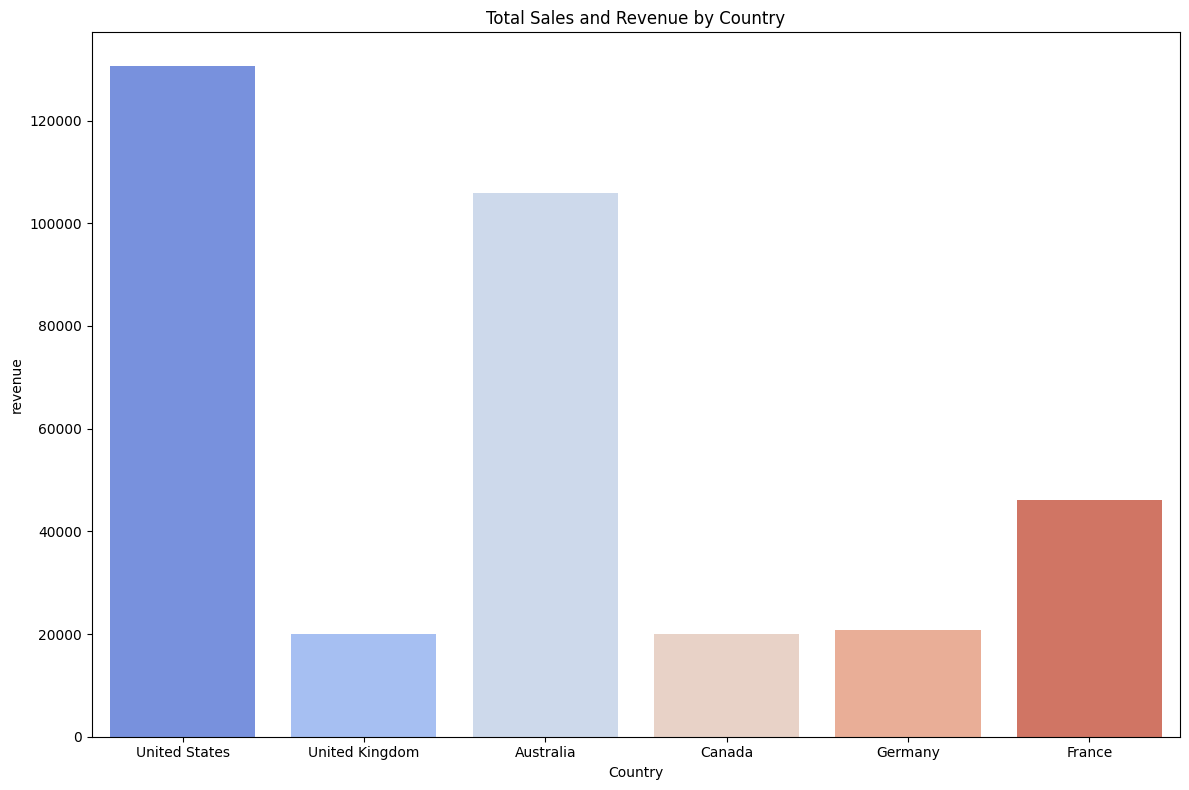

In [ ]:

data3= ['order_quantity','revenue']

for i, col in enumerate(data3):
  plt.figure(figsize=(12,8))
  sns.barplot(
      data = df,
      x = df['country'],
      y = df[col],
      errorbar= None,
      palette = 'coolwarm',
      estimator = np.sum
  )
  plt.title(f'Total Sales and Revenue by Country')
  plt.xlabel('Country')
  plt.tight_layout()
  plt.show()


In [ ]:
df.head()

,sales_order,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_description,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,2021-12-01,1,December,2021,39,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180
1,261695,2021-12-01,1,December,2021,44,Adults (35-64),Male,United Kingdom,England,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
2,261697,2021-12-02,2,December,2021,37,Adults (35-64),Male,United States,California,"Mountain-400-W Silver, 46",2,420,769,698,840,1538
3,261698,2021-12-02,2,December,2021,31,Young Adults (25-34),Female,Australia,New South Wales,"Mountain-400-W Silver, 42",1,420,769,349,420,769
4,261699,2021-12-03,3,December,2021,37,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590


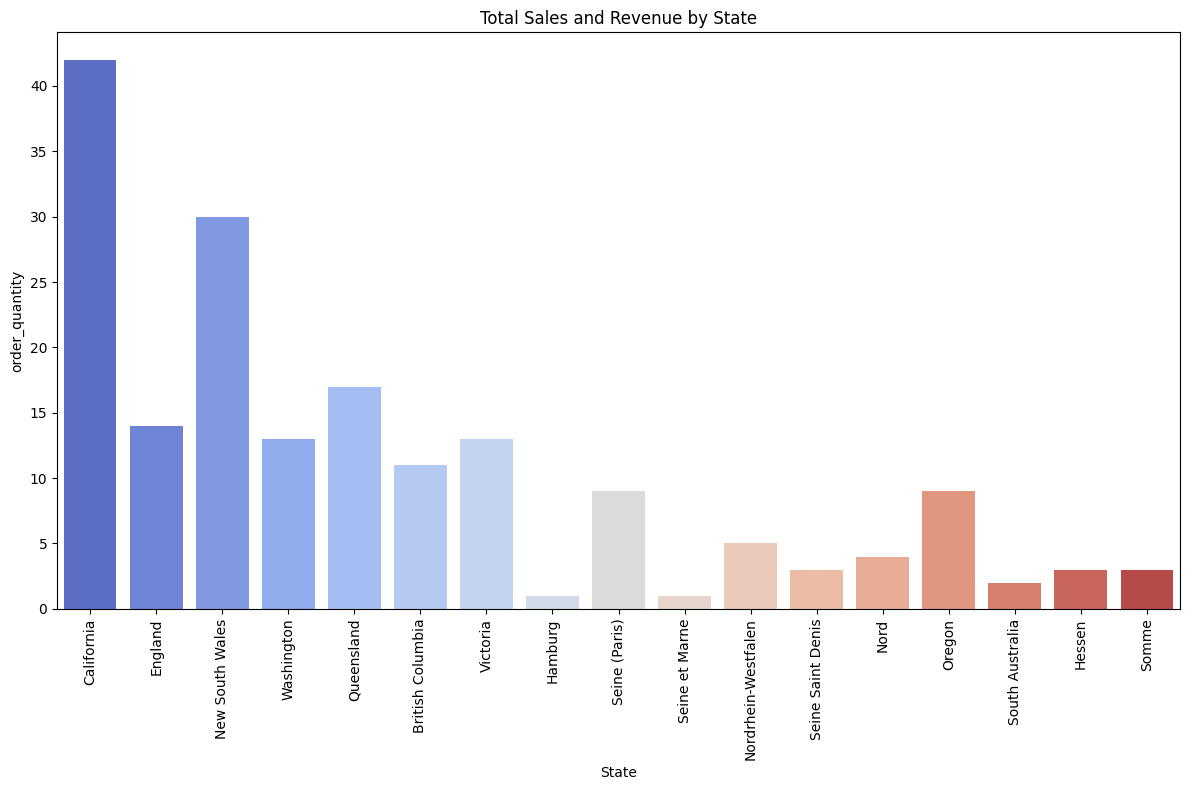

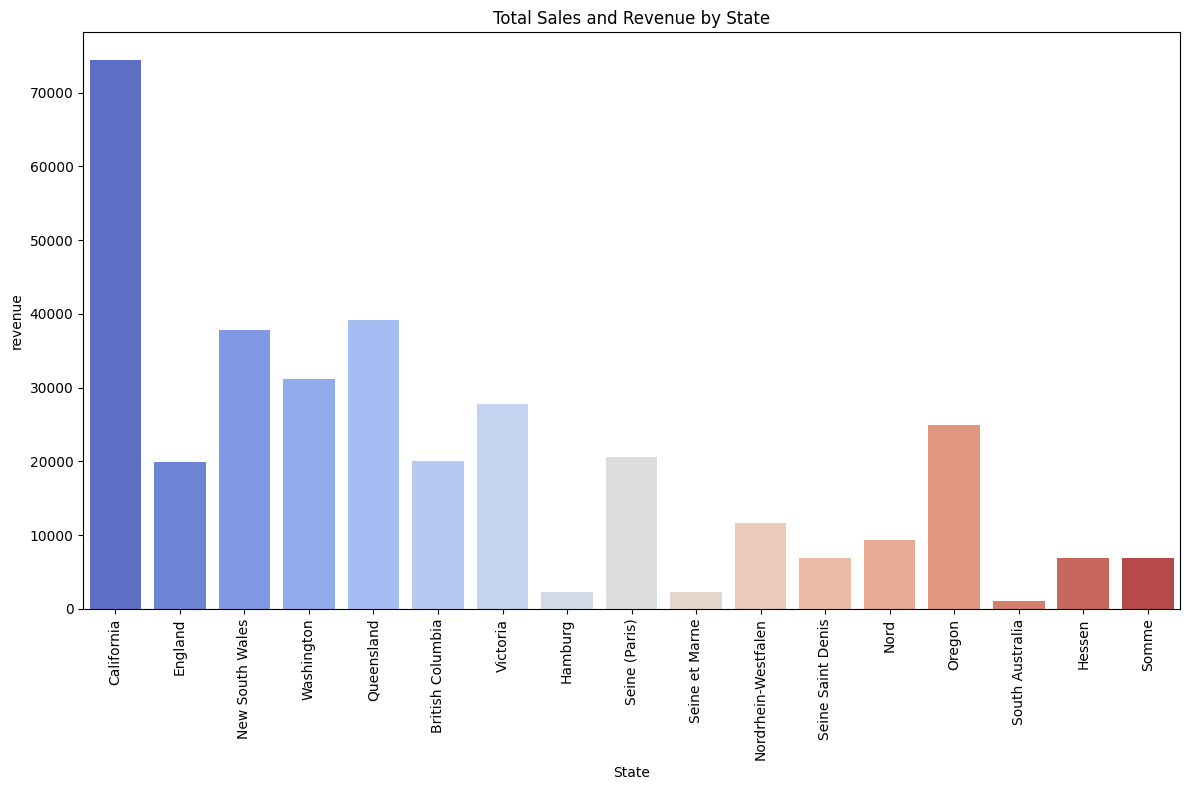

In [ ]:
data3= ['order_quantity','revenue']

for i, col in enumerate(data3):
  plt.figure(figsize=(12,8))
  sns.barplot(
      data = df,
      x = df['state'],
      y = df[col],
      errorbar= None,
      palette = 'coolwarm',
      estimator = np.sum
  )
  plt.title(f'Total Sales and Revenue by State')
  plt.xticks(rotation = 90)
  plt.xlabel('State')
  plt.tight_layout()
  plt.show()


In [ ]:
df = df.rename(columns={'order_quantity': 'Order Quantity'})

In [ ]:
df.head()

,sales_order,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_description,Order Quantity,unit_cost,unit_price,profit,cost,revenue
0,261695,2021-12-01,1,December,2021,39,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180
1,261695,2021-12-01,1,December,2021,44,Adults (35-64),Male,United Kingdom,England,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
2,261697,2021-12-02,2,December,2021,37,Adults (35-64),Male,United States,California,"Mountain-400-W Silver, 46",2,420,769,698,840,1538
3,261698,2021-12-02,2,December,2021,31,Young Adults (25-34),Female,Australia,New South Wales,"Mountain-400-W Silver, 42",1,420,769,349,420,769
4,261699,2021-12-03,3,December,2021,37,Adults (35-64),Female,United States,California,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
